In [ ]:
# \\

영화 데이터셋을 이용해서 추천시스템을 구축
  - 협업필터링
    - 사용자 기반
    - 아이템 기반
  - 최근접 이웃 개념을 사용

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9],
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

In [7]:
# 이웃의 수
k = 5
# 테스트 데이터 포인트
test_data_point = [[4.3,2.7]]

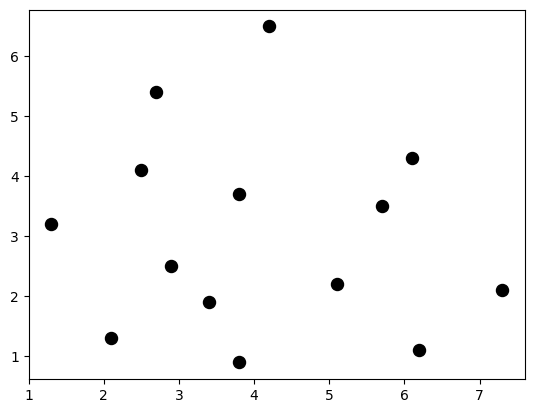

In [4]:
# 입력 데이터의 시각화
plt.scatter(X[:,0], X[:,1],marker='o',color='black',s=75)
plt.show()

In [8]:
# 모델 생성 & 훈련
knn_model = NearestNeighbors(n_neighbors=k,algorithm='ball_tree').fit(X)
distance, indices =  knn_model.kneighbors(test_data_point)
distance, indices

(array([[0.94339811, 1.11803399, 1.20415946, 1.41421356, 1.61245155]]),
 array([[12,  7,  9,  2, 10]]))

In [12]:
X[indices]

array([[[5.1, 2.2],
        [3.8, 3.7],
        [3.4, 1.9],
        [2.9, 2.5],
        [5.7, 3.5]]])

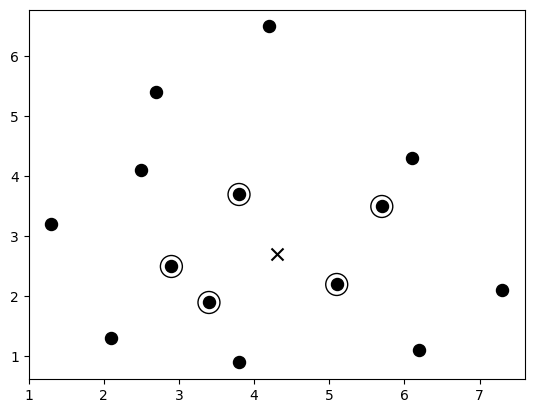

In [16]:
# 테스트데이터와 근접한(최근접) 이웃을 시각화
plt.scatter(X[:,0], X[:,1],marker='o',color='black',s=75)
plt.scatter(X[indices][0][:,0], X[indices][0][:,1],marker='o',color='k',s=250,facecolors='none')
plt.scatter(test_data_point[0][0],test_data_point[0][1],marker='x',color='k',s=75)
plt.show()

In [14]:
test_data_point

[[4.3, 2.7]]

k-means 분류기 생성

In [18]:
import matplotlib.cm as cm
from sklearn import neighbors,datasets

In [19]:
fileinput = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/14%EC%A3%BC%EC%B0%A8/data.txt'

In [21]:
data = np.loadtxt(fileinput,delimiter=',')
X,y = data[:,:-1], data[:,-1]

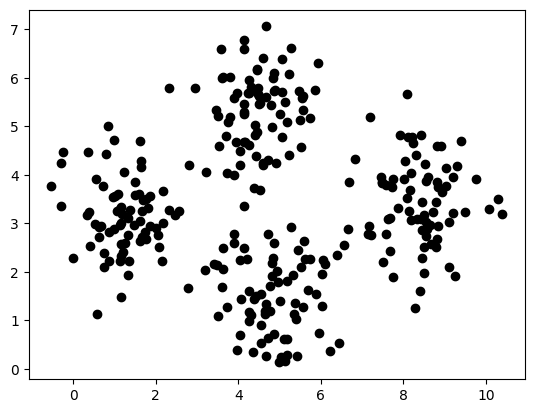

In [25]:
# 시각화
markers = "v^os"
for i in range(len(np.unique(y))):
  plt.scatter(X[y==i][:,0],X[y==i][:,1],color='black')

In [27]:
num_neighbors = 12
classifier = neighbors.KNeighborsClassifier(num_neighbors,weights='distance').fit(X,y)

In [34]:
# 경계를그리기 위한 매시
x_min,x_max = X[:,0].min()-1, X[:,0].min()+1
y_min,y_max = X[:,1].min()-1, X[:,1].min()+1
x_values,y_values =  np.meshgrid(np.arange(x_min,x_max), np.arange(y_min,y_max))

In [35]:
output = classifier.predict( np.c_[x_values.ravel(),y_values.ravel()])

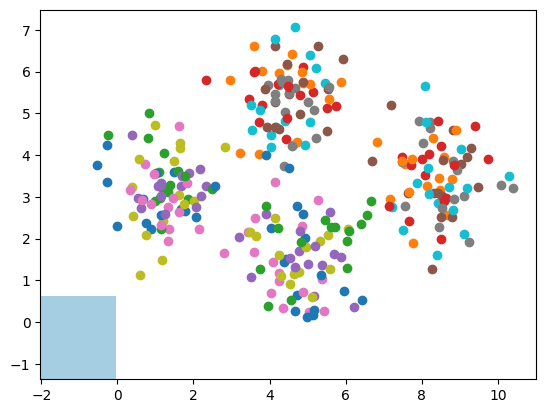

In [38]:
output = output.reshape(x_values.shape)
plt.pcolormesh(x_values,y_values,output,cmap=cm.Paired)
for i in range(X.shape[0]):
  plt.scatter(X[i,0],X[i,1])
plt.show()